# Online Shoppers Purchasing Intention
[Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)

__Data Dictionary__

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("online_shoppers_intention.csv")

In [4]:
df.shape

(12330, 18)

In [5]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [8]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [9]:
df.describe(include='O').T

count unique                top   freq
Month        12330     10                May   3364
VisitorType  12330      3  Returning_Visitor  10551

In [10]:
# Check for Null Values
df.isnull().sum().sum()

0

In [11]:
# Check for duplicates
df.duplicated().sum()

125

In [12]:
# Check Conversion Rate (Revenue) for duplicate entries
df[df.duplicated()]['Revenue'].value_counts()

False    125
Name: Revenue, dtype: int64

In [13]:
# Given Conversion Rate For the Year
df['Revenue'].value_counts(normalize=True)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [14]:
import pandas_profiling as pp
report = pp.ProfileReport(df)
report

In [15]:
# Export PandasProfilingReport 
report.to_file("PPReport.html")

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(12205, 18)

In [18]:
# Map Boolean values to 0 and 1
df['Weekend'] = df['Weekend'].map({False:0, True:1})
df['Revenue'] = df['Revenue'].map({False:0, True:1})

### Univariate & Bivariate Analysis

0    10297
1     1908
Name: Revenue, dtype: int64
0    0.843671
1    0.156329
Name: Revenue, dtype: float64


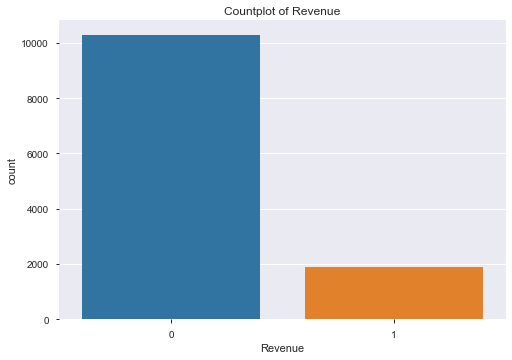

In [19]:
# Target Analysis 
print(df['Revenue'].value_counts())
print(df['Revenue'].value_counts(normalize=True))
sns.countplot(df['Revenue'])
plt.title("Countplot of Revenue")
plt.show()

The baseline revenue generation through Online Shoppers for the given year is **15.63%**.  

In [20]:
# Function to create combined univariate and bivariate plots of categorical variables
def combined_plots(col):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.countplot(df[col])
    plt.title(f"Countplot of {col}")

    plt.subplot(1,2,2)
    sns.countplot(df[col], hue=df['Revenue'])
    plt.title(f"Countplot of {col} VS Revenue")
    plt.show()

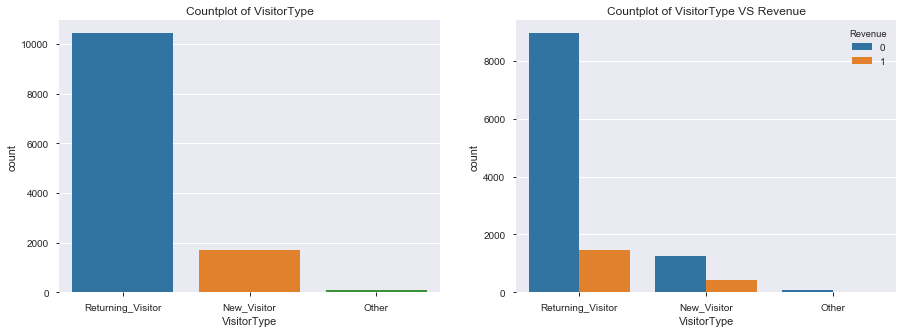

In [21]:
combined_plots('VisitorType')

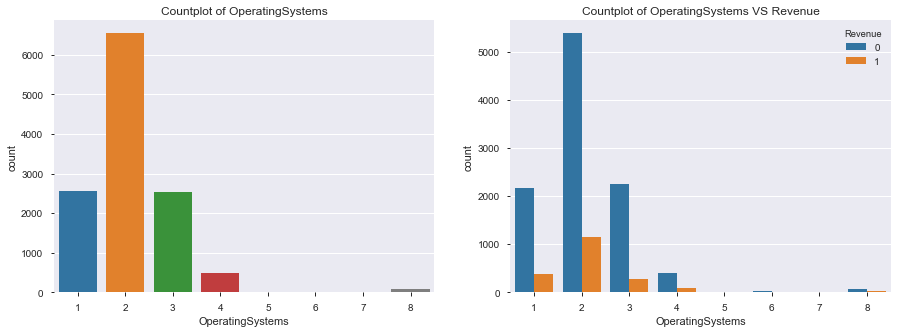

In [22]:
combined_plots('OperatingSystems')

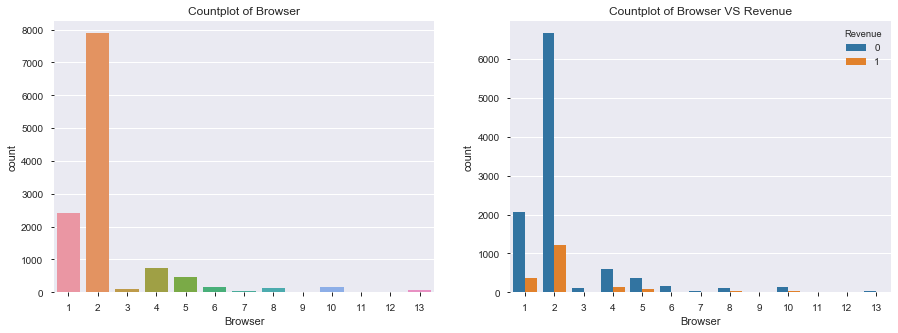

In [23]:
combined_plots('Browser')

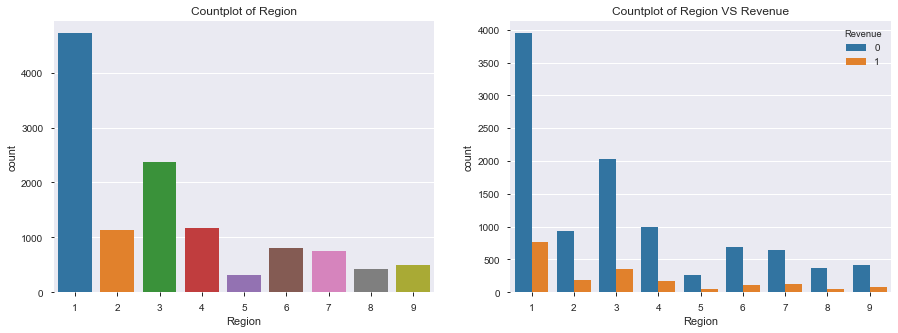

In [24]:
combined_plots('Region')

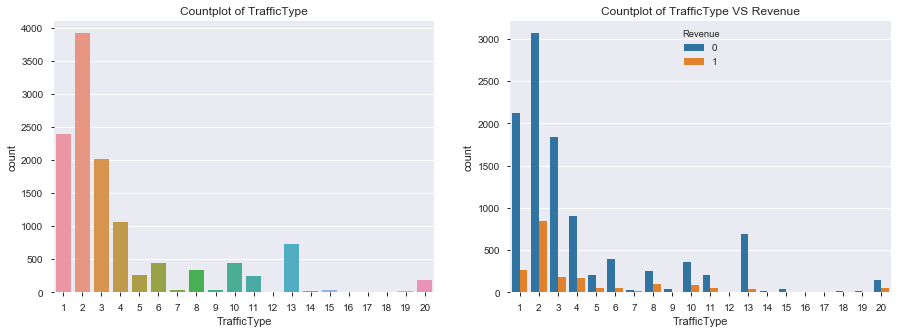

In [25]:
combined_plots('TrafficType')

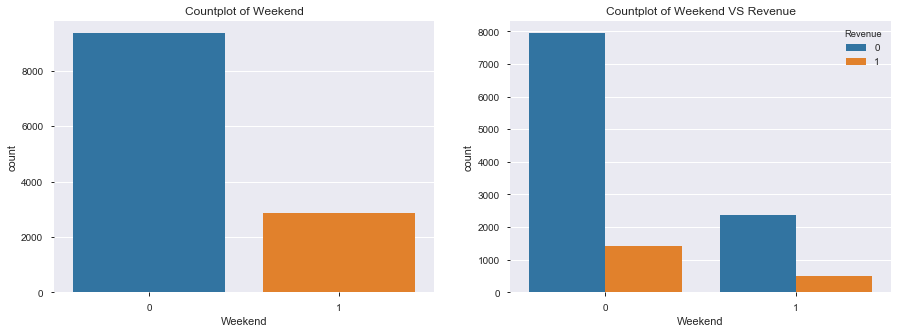

In [26]:
combined_plots('Weekend')

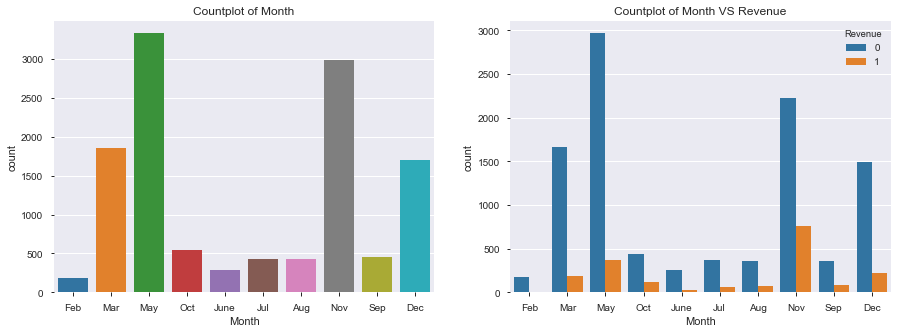

In [27]:
combined_plots('Month')

In [28]:
# Percentage difference between nov and may 

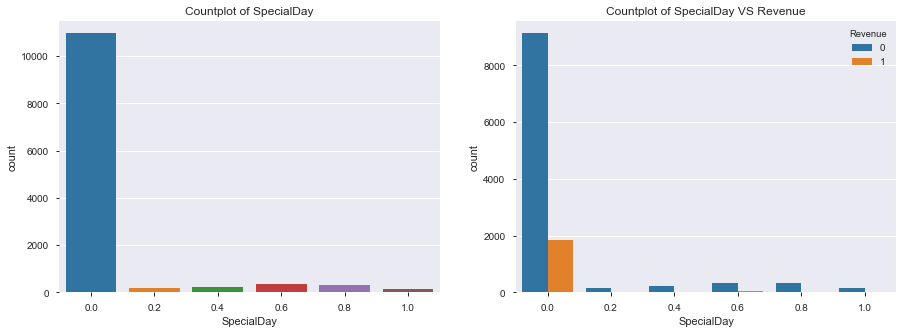

In [29]:
combined_plots('SpecialDay')

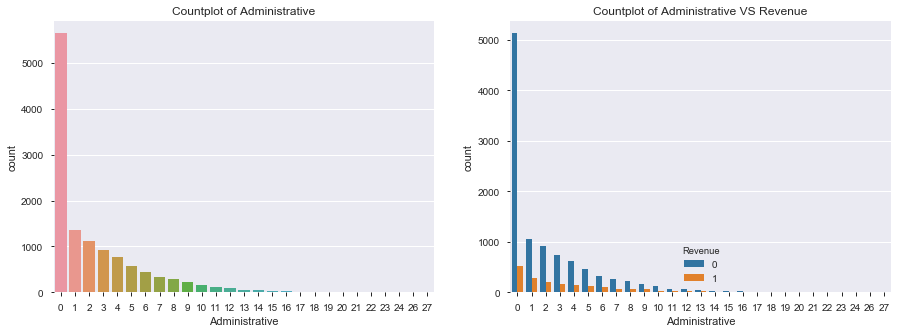

In [30]:
combined_plots('Administrative')

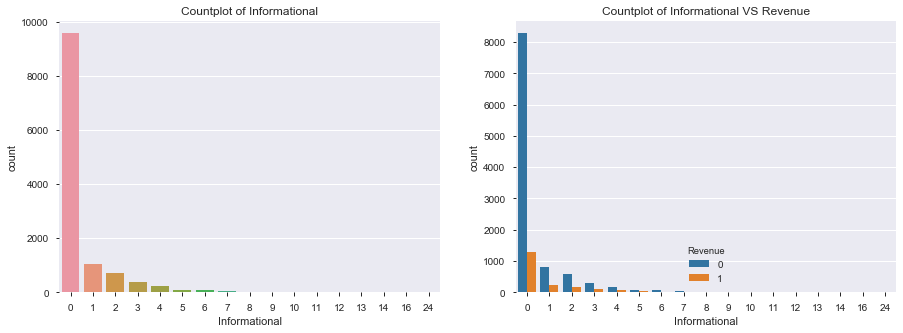

In [31]:
combined_plots('Informational')

__Univariate Observations:__

- Mostly used OSes are: 2, 3 & 1.
- Mostly used browser are: 2 & 1.
- Traffic type is mostly via: 1, 2, 3, 4& 13.
- People mostly visit on weekdays.
- Majority of customers are from region 1 & 3.
- Average time spent on ProductRelated pages is more than Administrative and Informational Pages.


__Bivariate Observations:__

- Revenue is more on Weekdays.
- November has contributed the most in revenue followed by May & December while February followed by June has contributed the least.
- More revenue is generated from the Returning visitors.
- OS Type '2' has generated the most revenue followed by Type '1'.
- Browser Type '2' has generated the most revenue followed by Type '1'.
- Traffic Type '2' has generated the most revenue followed by Type '1' and '3'.
- Majority of revenue are from Region 1, 3 & 4.

In [32]:
num_cols = ['Administrative','Administrative_Duration', 'Informational', 'Informational_Duration',
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

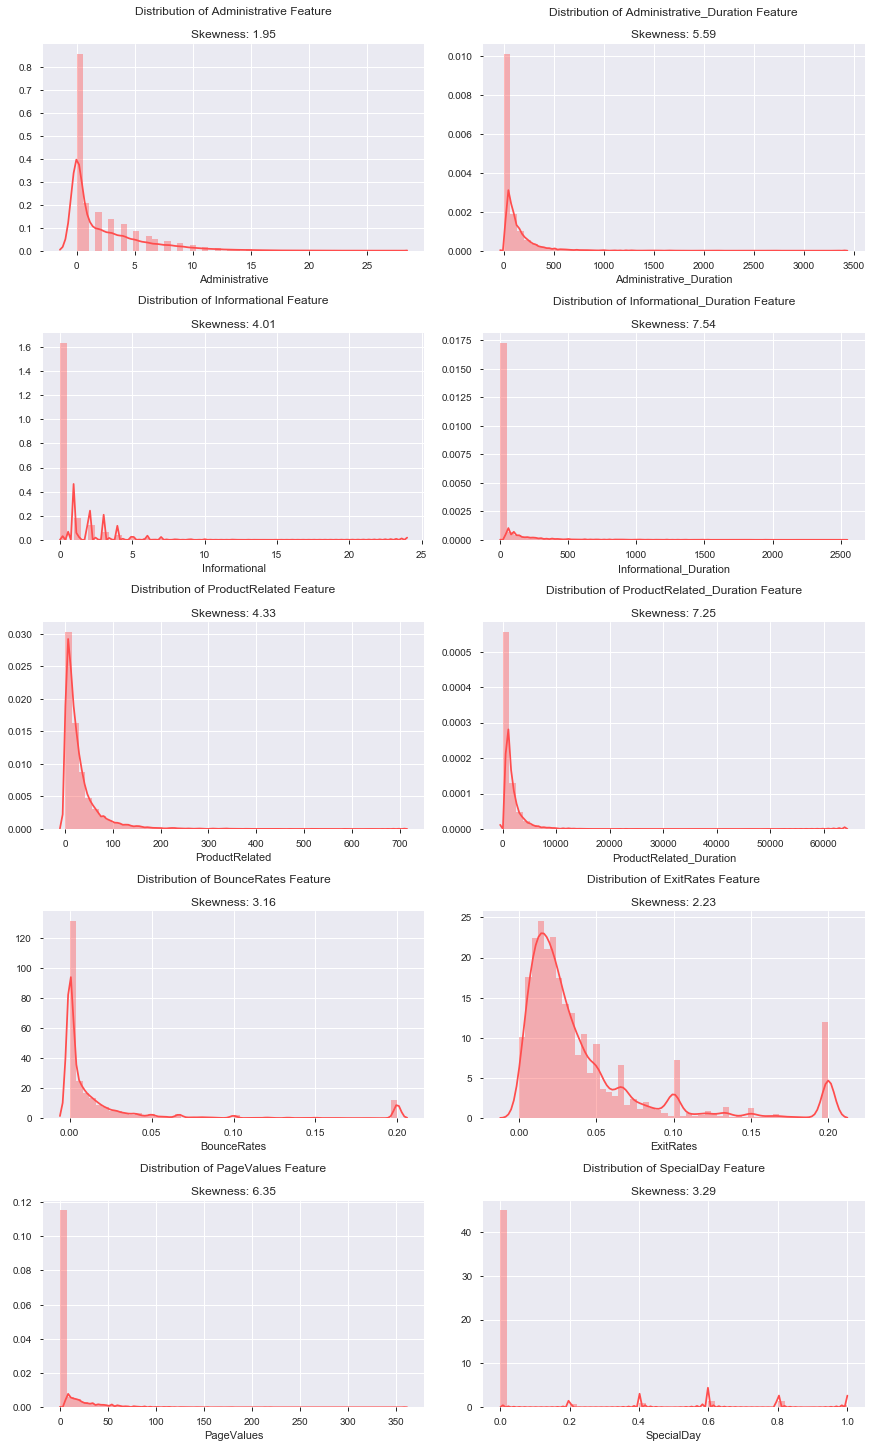

In [33]:
figs, axes = plt.subplots(5,2, figsize=(12,20), constrained_layout=True)
for col, ax in zip(num_cols, axes.flat):
    sns.distplot(df[col], ax=ax, color='#ff4d4d')
    ax.set_title("Distribution of {} Feature\n\nSkewness: {}".format(col, round(df[col].skew(),2)))
plt.show()

In [34]:
transformed_df = pd.DataFrame({'Features': num_cols, 'Skewness': np.round(df[num_cols].skew().values,2), 
                               'Log_T': np.round(np.log1p(df[num_cols]).skew().values,2),
                               'Sqrt_T': np.round(np.sqrt(df[num_cols]).skew().values,2),
                               'Cbrt_T': np.round(np.cbrt(df[num_cols]).skew().values,2),
                               '4thPower_T': np.round(np.power(df[num_cols],1/4).skew().values,2),
                               '5thPower_T': np.round(np.power(df[num_cols],1/5).skew().values,2),
                               '6thPower_T': np.round(np.power(df[num_cols],1/6).skew().values,2),
                               '7thPower_T': np.round(np.power(df[num_cols],1/7).skew().values,2)})
transformed_df

Features  Skewness  Log_T  Sqrt_T  Cbrt_T  4thPower_T  \
0           Administrative      1.95   0.55    0.63    0.24        0.08   
1  Administrative_Duration      5.59   0.24    1.53    0.69        0.37   
2            Informational      4.01   2.01    1.93    1.62        1.51   
3   Informational_Duration      7.54   1.90    3.42    2.43        2.05   
4           ProductRelated      4.33  -0.04    1.50    0.81        0.45   
5  ProductRelated_Duration      7.25  -1.43    1.41    0.42       -0.21   
6              BounceRates      3.16   3.08    1.72    0.90        0.48   
7                ExitRates      2.23   2.13    1.21    0.69        0.26   
8               PageValues      6.35   1.79    2.52    1.89        1.66   
9               SpecialDay      3.29   3.10    2.86    2.74        2.70   

   5thPower_T  6thPower_T  7thPower_T  
0        0.00       -0.04       -0.07  
1        0.21        0.12        0.06  
2        1.46        1.44        1.42  
3        1.87        1.77        1.70  
4        0.19       -0.06       -0.31  
5       -0.72       -1.17       -1.56  
6        0.26        0.13        0.05  
7       -0.17       -0.64       -1.15  
8        1.54        1.48        1.44  
9        2.67        2.66        2.65

In [35]:
transformed_df.to_csv('transformedvalues_df.csv', index=False)

In [36]:
print("Average Time Spent on Administrative Page:", round(np.mean(df['Administrative_Duration']),2))
print("Average Time Spent on Informational Page:", round(np.mean(df['Informational_Duration']),2))
print("Average Time Spent on ProductRelated Page:", round(np.mean(df['ProductRelated_Duration']),2))

Average Time Spent on Administrative Page: 81.65
Average Time Spent on Informational Page: 34.83
Average Time Spent on ProductRelated Page: 1206.98


#### Which TrafficTypes have generated no Revenue? 

In [37]:
df.groupby('TrafficType')['Revenue'].sum().sort_values()[:4]

TrafficType
18    0
17    0
15    0
12    0
Name: Revenue, dtype: int64

#### Which TrafficType(s) has generated maximum Revenue? 

In [38]:
df.groupby('TrafficType')['Revenue'].sum().sort_values(ascending=False)[:1]

TrafficType
2    847
Name: Revenue, dtype: int64

#### Which TrafficTypes generate high bounce rate and what is the overall Revenue generation from those TrafficTypes?

In [39]:
df[df['BounceRates'] > 0.1].groupby('TrafficType')['Revenue'].sum().sort_values(ascending=False)[:3]

TrafficType
11    2
20    1
8     1
Name: Revenue, dtype: int64

In [40]:
df[df['TrafficType'].isin([11,20,8])]['Revenue'].value_counts()

0    591
1    192
Name: Revenue, dtype: int64

    Bounce rate can be wildly different depending on the source of traffic. For example, it’s likely that search traffic will produce a low bounce rate while social and display traffic might produce a high bounce rate.

#### Which TrafficTypes generate high exit rate and what is the overall Revenue generation from those TrafficTypes?

In [41]:
df[df['ExitRates'] > 0.15].groupby('TrafficType')['Revenue'].sum().sort_values(ascending=False)[:3]

TrafficType
20    1
11    1
8     1
Name: Revenue, dtype: int64

In [42]:
df[df['TrafficType'].isin([11,20,8])]['Revenue'].value_counts(normalize=True)

0    0.754789
1    0.245211
Name: Revenue, dtype: float64

#### Which Region generates high bounce rate?

In [43]:
df[df['BounceRates'] > 0].groupby('Region')['BounceRates'].count().sort_values(ascending=False)[:1]

Region
1    2613
Name: BounceRates, dtype: int64

#### What is the fraction of Special Day every month?

In [44]:
df.groupby(['Month','SpecialDay'])['Revenue'].value_counts(normalize=True)

Month  SpecialDay  Revenue
Aug    0.0         0          0.824480
                   1          0.175520
Dec    0.0         0          0.873388
                   1          0.126612
Feb    0.0         0          0.990196
                   1          0.009804
       0.2         0          1.000000
       0.4         0          1.000000
       0.6         0          1.000000
       0.8         0          0.947368
                   1          0.052632
       1.0         0          0.800000
                   1          0.200000
Jul    0.0         0          0.847222
                   1          0.152778
June   0.0         0          0.898246
                   1          0.101754
Mar    0.0         0          0.896774
                   1          0.103226
May    0.0         0          0.865679
                   1          0.134321
       0.2         0          0.914110
                   1          0.085890
       0.4         0          0.941441
                   1          0.05855

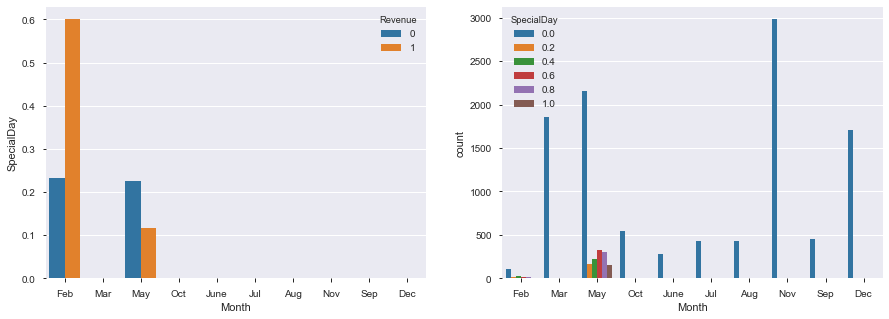

In [45]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df.Month, df.SpecialDay, hue = df.Revenue, ci = None)
plt.subplot(1,2,2)
sns.countplot(df['Month'], hue=df['SpecialDay'])
plt.show()

Special day only accounts for in the month of February and May. As per the data dictionary, Valentine's Day in February indicates the closeness of the site visiting time to a specific special day. In May, Eid is celebrated and since, Turkey is a Muslim country, the special day has maximum counts in May. 

#### What are average values of numerical features for users likely to make a transaction?

In [46]:
df[df['Revenue'] == 1].mean()

Administrative                3.393606
Administrative_Duration     119.483244
Informational                 0.786164
Informational_Duration       57.611427
ProductRelated               48.210168
ProductRelated_Duration    1876.209615
BounceRates                   0.005117
ExitRates                     0.019555
PageValues                   27.264518
SpecialDay                    0.023166
OperatingSystems              2.092767
Browser                       2.453354
Region                        3.082285
TrafficType                   4.021488
Weekend                       0.261530
Revenue                       1.000000
dtype: float64

Average time spent by user on Product Pages is 1876.209615. 

Average time spent by user on Administrative Pages is 119.483244. 

Average time spent by user on Informational Pages is 57.11427. 

### Multivariate Analysis

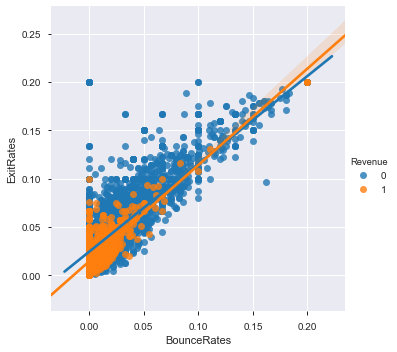

In [47]:
sns.lmplot('BounceRates','ExitRates',hue='Revenue', data=df)
plt.show()

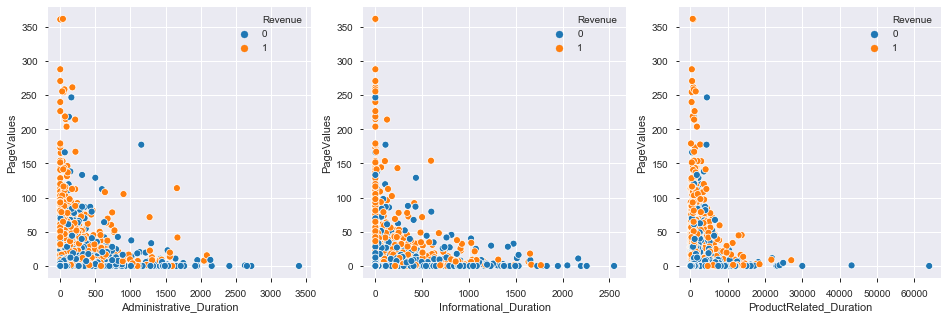

In [48]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.scatterplot('Administrative_Duration', 'PageValues', hue='Revenue', data=df)
plt.subplot(1,3,2)
sns.scatterplot('Informational_Duration', 'PageValues', hue='Revenue', data=df)
plt.subplot(1,3,3)
sns.scatterplot('ProductRelated_Duration', 'PageValues', hue='Revenue', data=df)
plt.show()

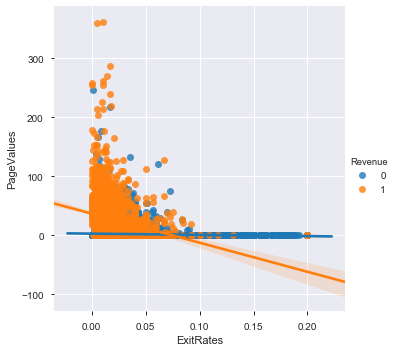

In [49]:
sns.lmplot('ExitRates','PageValues',hue='Revenue', data=df);

- More page values less exit rates.
- Revenue is also more with increase in page values.

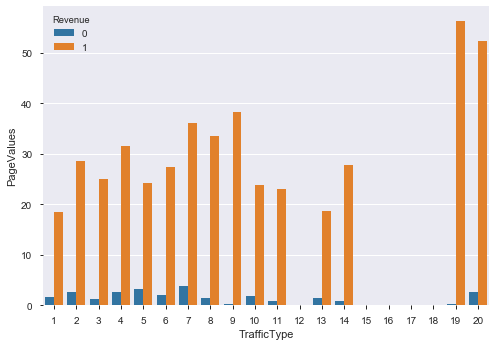

In [50]:
sns.barplot(df.TrafficType, df.PageValues, hue = df.Revenue, ci = None);

- Traffic Type 19 & 20 encountered more page values along with increase in Revenue generation.

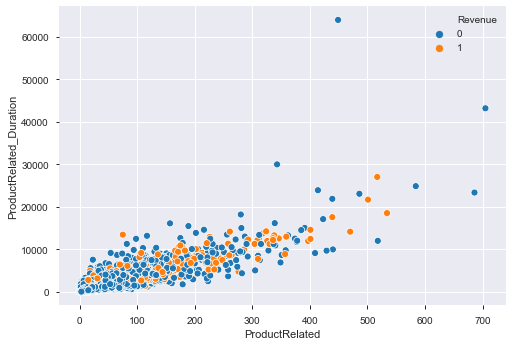

In [51]:
sns.scatterplot(df.ProductRelated, df.ProductRelated_Duration, hue = df.Revenue);

- Linear relationship between product related pages and duration spent with increase in revenue but after a point no revenue. 
        Assumption: User might be getting confused due to too many choice out there.

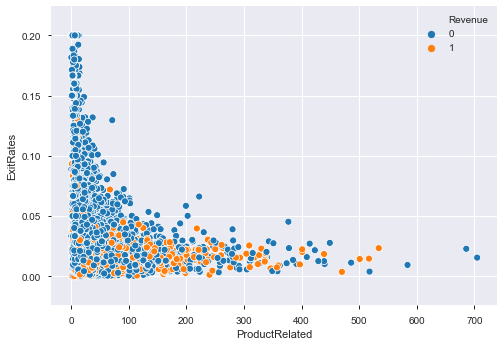

In [52]:
sns.scatterplot(df.ProductRelated, df.ExitRates, hue = df.Revenue);

- Exit rate decreases with increase in product pages, also positive revenue starts showing.

__Observations:__

- For the revenue to be generated administrative visits are more assuming user needs to login to make payments.
- For product related visits there is no relation with revenue ,both are equally likely.
- Bounce rate & exit rate is more in case of revenue not being generated.
- More page views leads to more revenue.

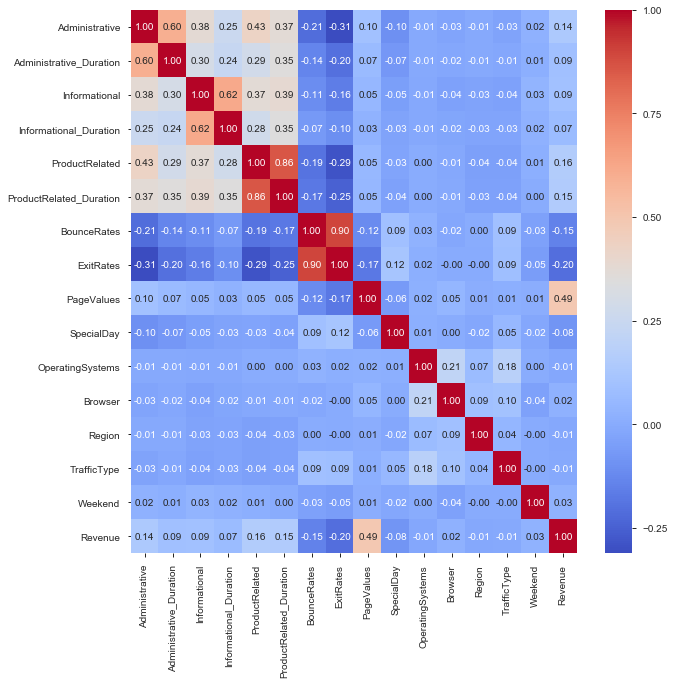

In [53]:
plt.figure(figsize=[10,10])
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.ylim(16, 0)
plt.show()

In [54]:
# Find all correlations and sort 
correlations_data = df.corr()['Revenue'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')

# Print the most positive correlations
print(correlations_data.tail(10))

ExitRates                 -0.204320
BounceRates               -0.145091
SpecialDay                -0.083601
OperatingSystems          -0.014927
Region                    -0.012725
TrafficType               -0.005618
Browser                    0.024052
Weekend                    0.027729
Informational_Duration     0.069358
Administrative_Duration    0.091768
Name: Revenue, dtype: float64 

Browser                    0.024052
Weekend                    0.027729
Informational_Duration     0.069358
Administrative_Duration    0.091768
Informational              0.093626
Administrative             0.136330
ProductRelated_Duration    0.150077
ProductRelated             0.156042
PageValues                 0.491894
Revenue                    1.000000
Name: Revenue, dtype: float64


In [55]:
transformed_df

Features  Skewness  Log_T  Sqrt_T  Cbrt_T  4thPower_T  \
0           Administrative      1.95   0.55    0.63    0.24        0.08   
1  Administrative_Duration      5.59   0.24    1.53    0.69        0.37   
2            Informational      4.01   2.01    1.93    1.62        1.51   
3   Informational_Duration      7.54   1.90    3.42    2.43        2.05   
4           ProductRelated      4.33  -0.04    1.50    0.81        0.45   
5  ProductRelated_Duration      7.25  -1.43    1.41    0.42       -0.21   
6              BounceRates      3.16   3.08    1.72    0.90        0.48   
7                ExitRates      2.23   2.13    1.21    0.69        0.26   
8               PageValues      6.35   1.79    2.52    1.89        1.66   
9               SpecialDay      3.29   3.10    2.86    2.74        2.70   

   5thPower_T  6thPower_T  7thPower_T  
0        0.00       -0.04       -0.07  
1        0.21        0.12        0.06  
2        1.46        1.44        1.42  
3        1.87        1.77        1.70  
4        0.19       -0.06       -0.31  
5       -0.72       -1.17       -1.56  
6        0.26        0.13        0.05  
7       -0.17       -0.64       -1.15  
8        1.54        1.48        1.44  
9        2.67        2.66        2.65

In [56]:
df['Administrative'] = np.power(df['Administrative'],1/5)
df['Administrative_Duration'] = np.power(df['Administrative_Duration'],1/7)
df['Informational'] = np.power(df['Informational'],1/7)
df['Informational_Duration'] = np.power(df['Informational_Duration'],1/7)
df['ProductRelated'] = np.log1p(df['ProductRelated'])
df['ProductRelated_Duration'] = np.power(df['ProductRelated_Duration'],1/4)
df['BounceRates'] = np.power(df['BounceRates'],1/7)
df['ExitRates'] = np.power(df['ExitRates'],1/5)
df['PageValues'] = np.power(df['PageValues'],1/7)

In [57]:
df['SpecialDay'] = df['SpecialDay'].astype('category')

In [58]:
df.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0        0.693147                 0.000000   
1                     0.0        1.098612                 2.828427   
2                     0.0        0.693147                 0.000000   
3                     0.0        1.098612                 1.277886   
4                     0.0        2.397895                 5.004993   

   BounceRates  ExitRates  PageValues SpecialDay Month  OperatingSystems  \
0     0.794597   0.724780         0.0        0.0   Feb                 1   
1     0.000000   0.630957         0.0        0.0   Feb                 2   
2     0.794597   0.724780         0.0        0.0   Feb                 4   
3     0.651836   0.674879         0.0        0.0   Feb                 3   
4     0.571860   0.549280         0.0        0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12205 non-null float64
Administrative_Duration    12205 non-null float64
Informational              12205 non-null float64
Informational_Duration     12205 non-null float64
ProductRelated             12205 non-null float64
ProductRelated_Duration    12205 non-null float64
BounceRates                12205 non-null float64
ExitRates                  12205 non-null float64
PageValues                 12205 non-null float64
SpecialDay                 12205 non-null category
Month                      12205 non-null object
OperatingSystems           12205 non-null int64
Browser                    12205 non-null int64
Region                     12205 non-null int64
TrafficType                12205 non-null int64
VisitorType                12205 non-null object
Weekend                    12205 non-null int64
Revenue                    12205 non-null int64
dtyp

### Preprocessing & Base Model

In [60]:
df2 = pd.get_dummies(df, drop_first=True)

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 31 columns):
Administrative                   12205 non-null float64
Administrative_Duration          12205 non-null float64
Informational                    12205 non-null float64
Informational_Duration           12205 non-null float64
ProductRelated                   12205 non-null float64
ProductRelated_Duration          12205 non-null float64
BounceRates                      12205 non-null float64
ExitRates                        12205 non-null float64
PageValues                       12205 non-null float64
OperatingSystems                 12205 non-null int64
Browser                          12205 non-null int64
Region                           12205 non-null int64
TrafficType                      12205 non-null int64
Weekend                          12205 non-null int64
Revenue                          12205 non-null int64
SpecialDay_0.2                   12205 non-null uint8
SpecialDa

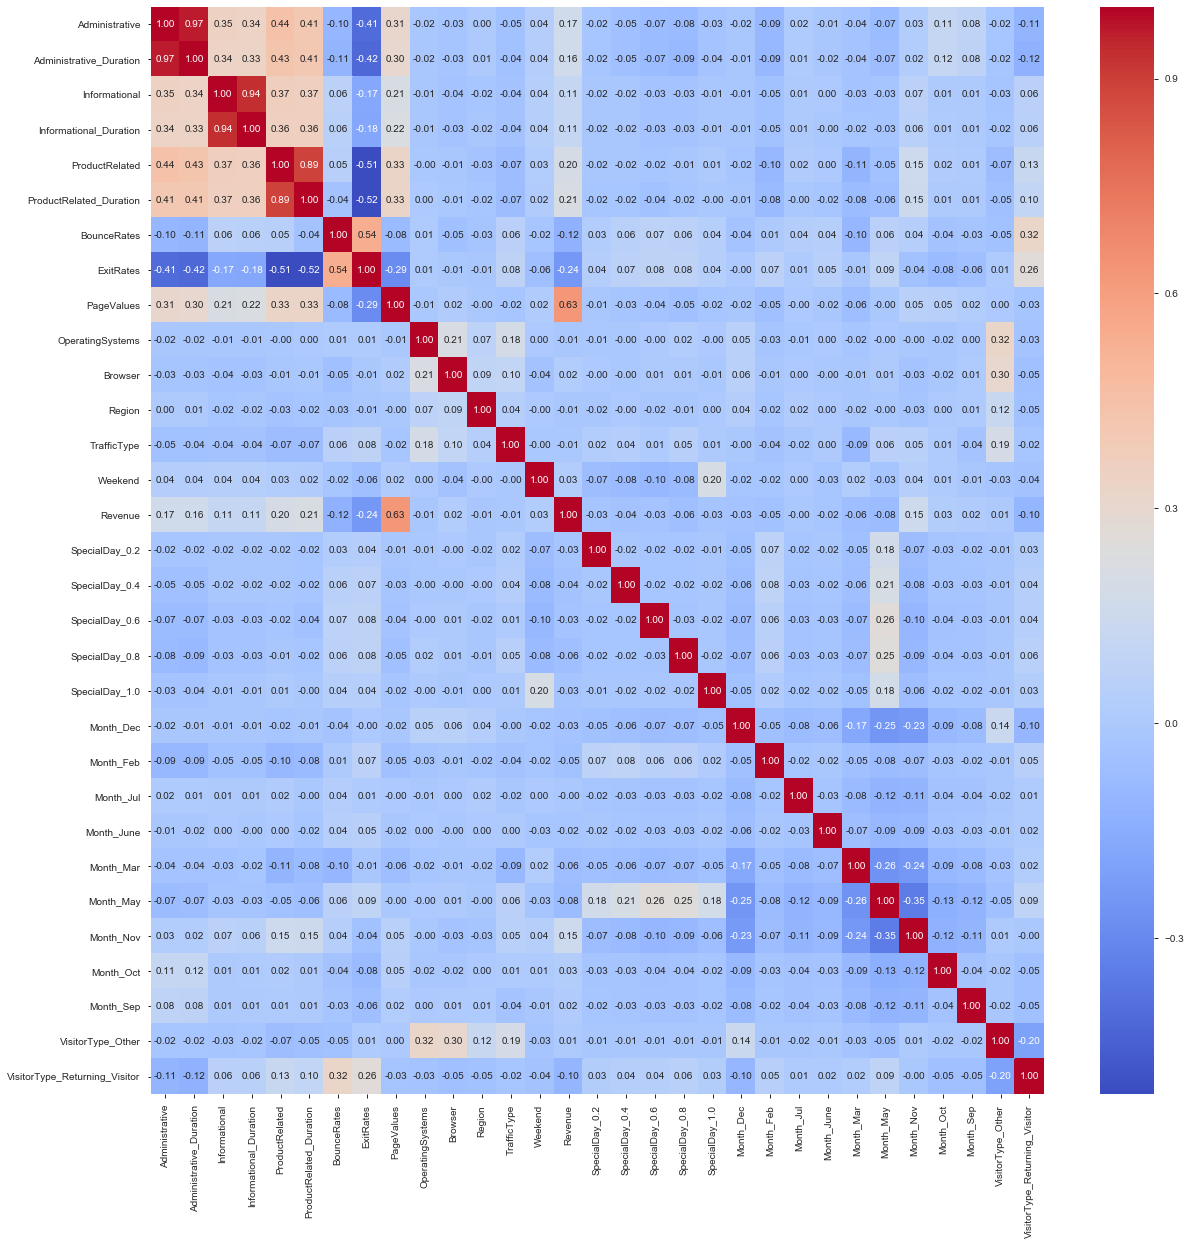

In [62]:
plt.figure(figsize=[20,20])
corr = df2.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.ylim(31, 0)
plt.show()

In [135]:
X = df2.drop('Revenue', axis=1)
y = df2['Revenue']

In [136]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [138]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
X_df = sm.add_constant(x_train_scaled)
# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
# View results
vif

variables        VIF
0                           const   1.000000
1                  Administrative  17.164135
2         Administrative_Duration  16.983261
3                   Informational   8.510602
4          Informational_Duration   8.429859
5                  ProductRelated   6.067797
6         ProductRelated_Duration   5.298907
7                     BounceRates   1.878378
8                       ExitRates   2.731867
9                      PageValues   1.194685
10               OperatingSystems   1.148729
11                        Browser   1.126457
12                         Region   1.026719
13                    TrafficType   1.084676
14                        Weekend   1.082706
15                 SpecialDay_0.2   1.069135
16                 SpecialDay_0.4   1.107320
17                 SpecialDay_0.6   1.143894
18                 SpecialDay_0.8   1.142219
19                 SpecialDay_1.0   1.102571
20                      Month_Dec   4.364433
21                      Month_Feb   1.453632
22                      Month_Jul   1.890935
23                     Month_June   1.650629
24                      Month_Mar   4.621188
25                      Month_May   6.767085
26                      Month_Nov   6.127910
27                      Month_Oct   2.181288
28                      Month_Sep   1.941402
29              VisitorType_Other   1.268010
30  VisitorType_Returning_Visitor   1.286910

In [140]:
# Keeping VIF less than 5
features_list = list(vif[vif['VIF'] < 5]['variables'])[1:]
print(len(features_list))
print(features_list)

22
['BounceRates', 'ExitRates', 'PageValues', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'SpecialDay_0.2', 'SpecialDay_0.4', 'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


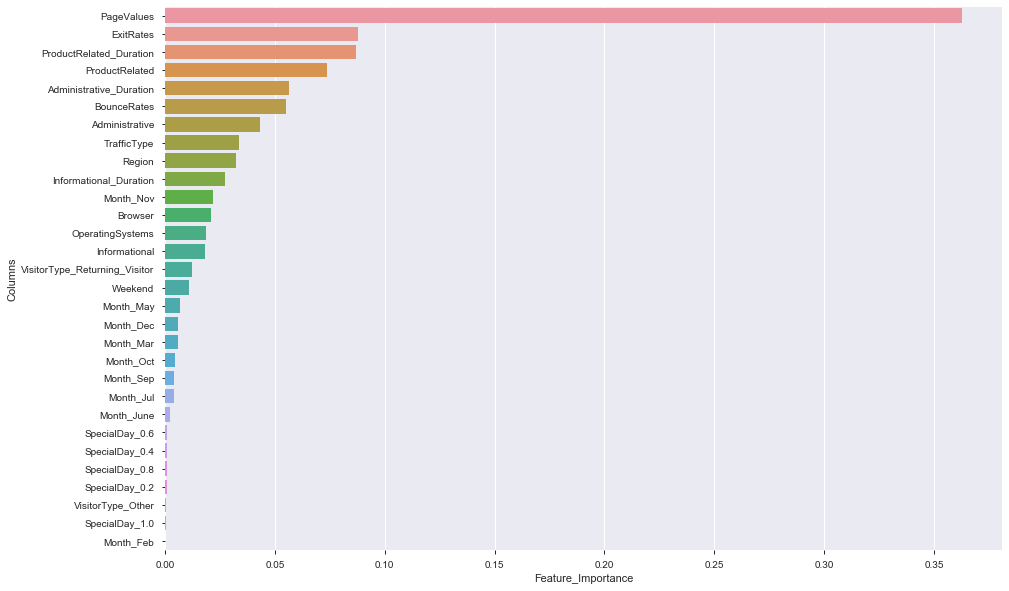

In [142]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train_scaled, y_train)
imp_features = pd.DataFrame({"Feature_Importance":rfc.feature_importances_, "Columns":x_train_scaled.columns})\
.sort_values('Feature_Importance',ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(imp_features['Feature_Importance'], imp_features['Columns'])
plt.show()

In [156]:
selected_features = list(imp_features['Columns'][:18].values)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
lr = LogisticRegression(solver='lbfgs')
y_pred = lr.fit(x_train_scaled,y_train).predict(x_test_scaled)

In [146]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, cohen_kappa_score, classification_report

In [147]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.8959584926269798
F1 Score: 0.6282926829268292
Cohen Kappa Score: 0.5681071740997163
Confusion Matrix:
 [[2959  157]
 [ 224  322]]


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3116
           1       0.67      0.59      0.63       546

    accuracy                           0.90      3662
   macro avg       0.80      0.77      0.78      3662
weighted avg       0.89      0.90      0.89      3662



In [159]:
list1 = []
for i in range(1, 20):

    selected_features = list(imp_features['Columns'][:i].values)
    # On Selected Features
    lr = LogisticRegression(solver='lbfgs')
    y_pred = lr.fit(x_train_scaled[selected_features],y_train).predict(x_test_scaled[selected_features])
    
    list1.append(f1_score(y_test, y_pred))
    #print("Accuracy Score:", accuracy_score(y_test, y_pred))
    #print("F1 Score:",f1_score(y_test, y_pred))
    #print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [161]:
for i, j in enumerate(list1):
    print(i, j)

0 0.6368515205724509
1 0.6391184573002754
2 0.6348623853211008
3 0.6389658356417358
4 0.6462962962962963
5 0.6351606805293005
6 0.6339622641509435
7 0.6312796208530806
8 0.6357615894039735
9 0.6362773029439697
10 0.6380487804878049
11 0.6433430515063168
12 0.6485436893203884
13 0.6471163245356795
14 0.6377097729516288
15 0.6390532544378699
16 0.6328125
17 0.6287952987267384
18 0.6280667320902846


### Clustering

In [284]:
selected_columns = ['BounceRates', 'ExitRates', 'ProductRelated_Duration']

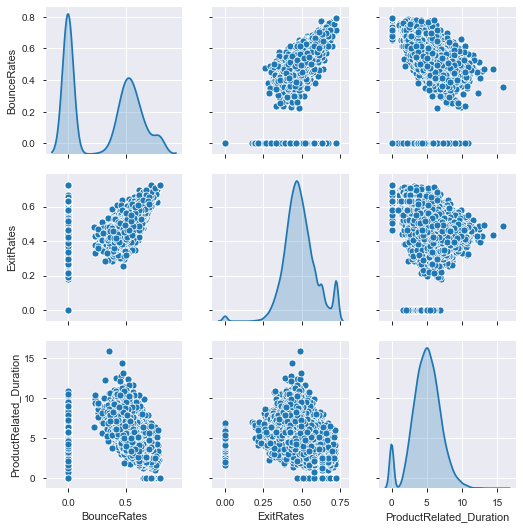

In [285]:
sns.pairplot(df2[selected_columns],diag_kind='kde')
plt.show()

In [286]:
ss = StandardScaler()
scaled_X = ss.fit_transform(df2[selected_columns])

In [287]:
from sklearn.cluster import KMeans

In [288]:
# Define clusters range
clusters_range = range( 1, 10)
# Within Clusters Sum of Squares
wcss = []

for num_clusters in clusters_range:
    k = KMeans(n_clusters=num_clusters, n_init=10, max_iter=300)
    model = k.fit(scaled_X)
    wcss.append(k.inertia_)

In [289]:
clusters_df = pd.DataFrame({"Clusters":clusters_range, "WCSS (Errors)":wcss})
clusters_df

Clusters  WCSS (Errors)
0         1   36615.000000
1         2   23188.507222
2         3   14172.579478
3         4   10701.248626
4         5    8194.749658
5         6    7102.108756
6         7    6017.326986
7         8    5167.077140
8         9    4615.887226

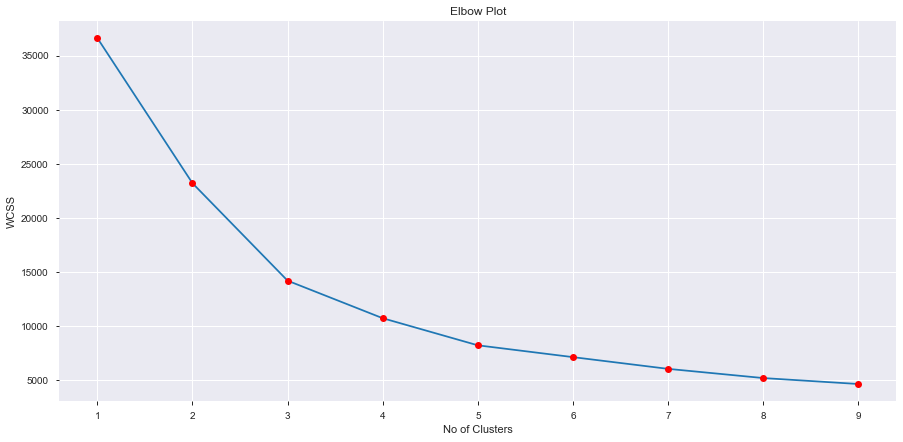

In [290]:
# Plot the Elbow
plt.figure(figsize=(15,7))
plt.plot(clusters_range, wcss, "-o", markerfacecolor = "r")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Plot")
plt.show()

In [277]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

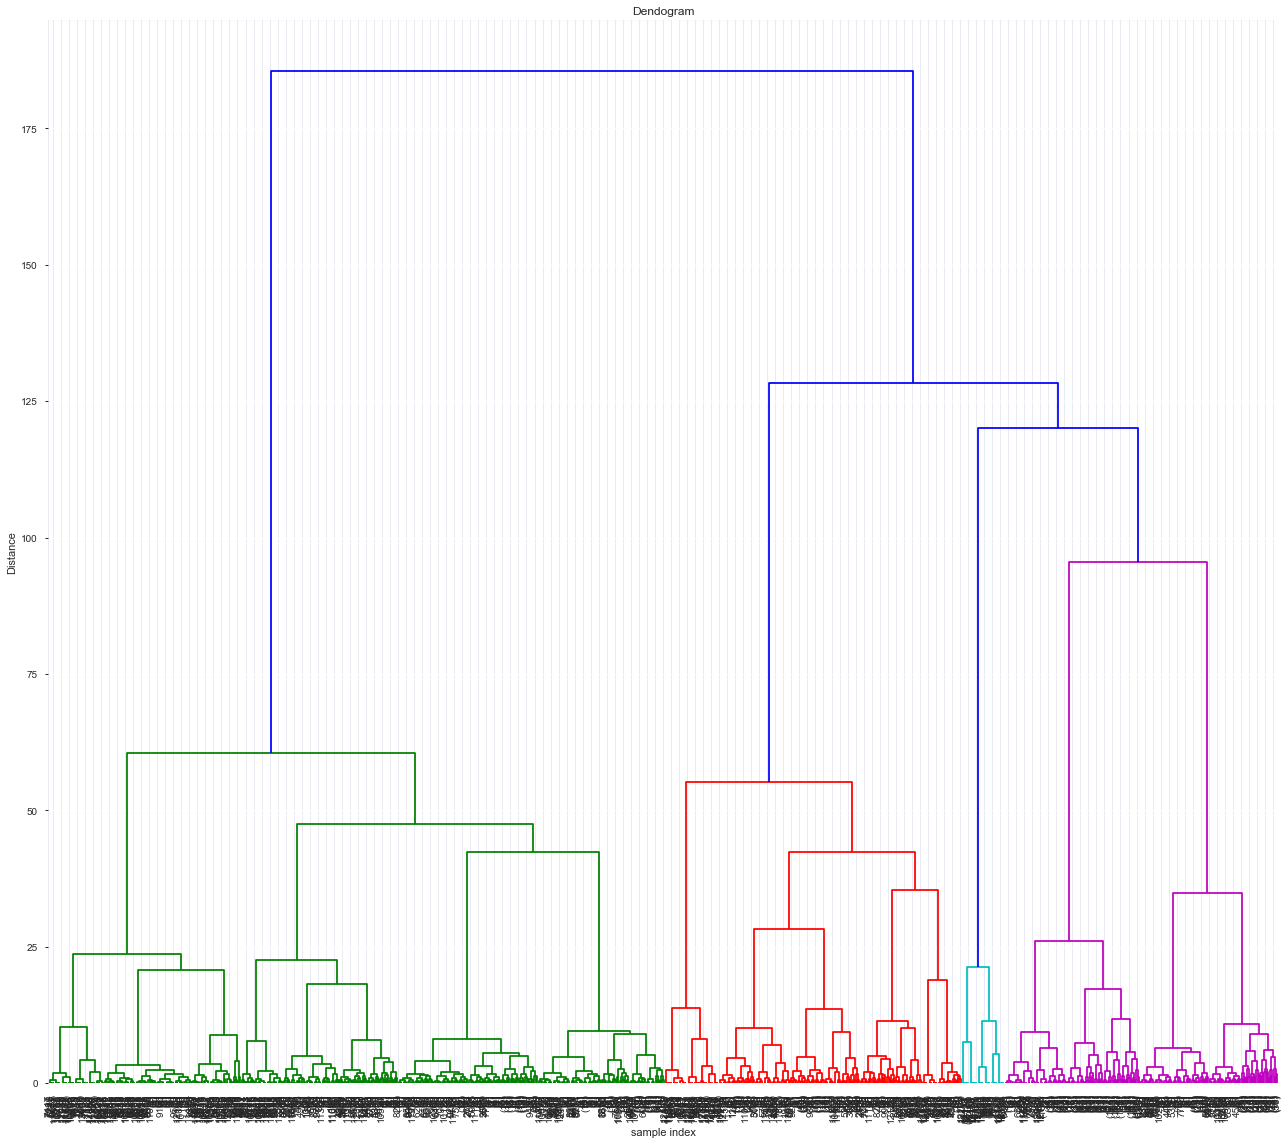

In [280]:
plt.figure(figsize=(18, 16))
plt.title('Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(scaled_X, 'ward')
dendrogram(Z, p=10, truncate_mode='level', color_threshold=100, leaf_rotation=90, leaf_font_size=10)
plt.tight_layout()